Bifurcation diagram implementation

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from PIL import Image
%matplotlib inline

# logistic_map
def f(x, r):
  return r * x * (1-x)

def bifurcation_diagram(x0=0.5,
  skipPlot=100, 
  plotNext=200, 
  plotWidth=500, 
  plotHeight=300, 
  rect=[0.25996, 0.61512, 3.426, 3.609]):
  im = Image.new("RGB", [plotWidth, plotHeight], color= 'white')
  px = im.load()
  
  xMin, xMax = rect[0], rect[1]
  rMin, rMax = rect[2], rect[3]
  xStepSize = (xMax - xMin) / plotHeight
  rs = np.linspace(rMin, rMax, plotWidth)
  for i in range(len(rs)):
    r = rs[i]
    buckets = np.zeros(plotHeight)
    currX = x0
    for j in range(skipPlot+plotNext):
      currX = f(currX, r)
      if j<skipPlot:
        continue
      if xMin<=currX and currX<=xMax:
        p = int((currX - xMin) / xStepSize)
        p = min(max(0, p), plotWidth-1)
        buckets[p] += 1
    buckets = (buckets / 150 * 255.).astype(np.uint8)
    #print(max(buckets))
    for j in range(len(buckets)):
      if buckets[j] >=0.2:
        px[i,plotHeight-j-1] = (64,128,255-buckets[j])
      else:
        px[i,plotHeight-j-1] = (255,255,255)
  plt.imshow(im)


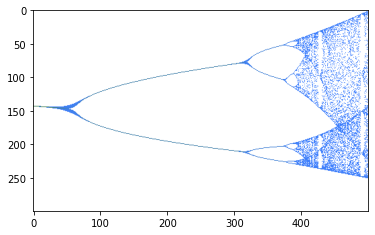

In [66]:
bifurcation_diagram(rect=[0.25996, 0.61512, 3.426, 3.609])

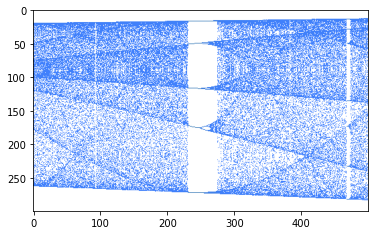

In [67]:
bifurcation_diagram(rect=[0.15144, 0.98015, 3.70302, 3.7789])